In [50]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

csv_path = 'Deepression.csv'
df = pd.read_csv(csv_path)

df.head()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,Mild
1,2,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate
2,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Severe
3,4,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,No depression
4,5,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Number             812 non-null    int64  
 1   Sleep              539 non-null    float64
 2   Appetite           539 non-null    float64
 3   Interest           539 non-null    float64
 4   Fatigue            539 non-null    float64
 5   Worthlessness      539 non-null    float64
 6   Concentration      539 non-null    float64
 7   Agitation          539 non-null    float64
 8   Suicidal Ideation  539 non-null    float64
 9   Sleep Disturbance  539 non-null    float64
 10  Aggression         539 non-null    float64
 11  Panic Attacks      539 non-null    float64
 12  Hopelessness       539 non-null    float64
 13  Restlessness       539 non-null    float64
 14  Low Energy         539 non-null    float64
 15  Depression State   539 non-null    object 
dtypes: float64(14), int64(1), 

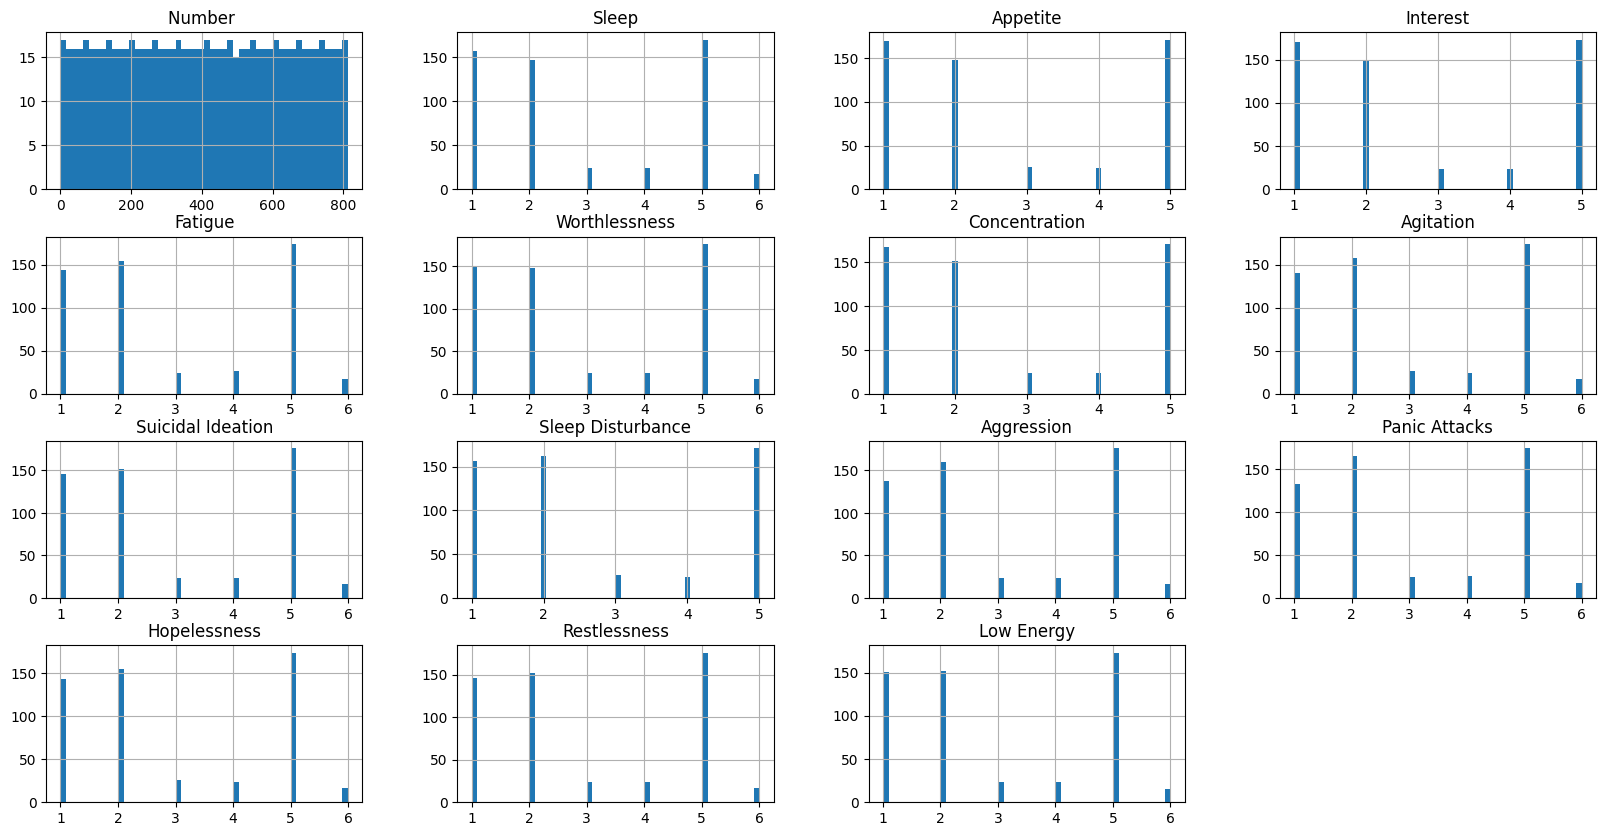

In [52]:
df.hist(bins=50 , figsize=(20,10))
plt.show()

In [53]:
df_cat = df[['Depression State']]
df_cat.head()

,Depression State
0,Mild
1,Moderate
2,Severe
3,No depression
4,Moderate


In [56]:
Depression_State_dic = {'No depression':0, '"No depression"':0, 'Mild':1, '"Mild"':1,
               'Moderate':2, '"Moderate"':2, 'Severe':3, 
               '"Severe"':3}

df["Depression State"].replace(Depression_State_dic, inplace=True)

In [57]:
df.head()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0
1,2,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,2.0
2,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0
3,4,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,0.0
4,5,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,2.0


In [58]:
df.corr()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
Number,1.000000,-0.003713,-0.077596,-0.082445,-0.004249,-0.013702,-0.067303,0.002783,-0.008911,-0.060696,0.000276,0.008675,-0.000784,-0.009365,-0.021091,-0.066649
Sleep,-0.003713,1.000000,0.018881,0.019037,-0.197034,-0.194575,0.018906,-0.197785,-0.197534,0.008256,-0.203536,-0.209102,-0.195539,-0.197534,-0.183981,0.153887
Appetite,-0.077596,0.018881,1.000000,0.994728,-0.412583,-0.417801,0.996018,-0.408922,-0.413610,0.995498,-0.405174,-0.395730,-0.412093,-0.413610,-0.304605,0.155800
Interest,-0.082445,0.019037,0.994728,1.000000,-0.412452,-0.415082,0.985463,-0.411392,-0.410918,0.990147,-0.402538,-0.397014,-0.414529,-0.410918,-0.312408,0.152047
Fatigue,-0.004249,-0.197034,-0.412583,-0.412452,1.000000,0.996324,-0.410556,0.993126,0.996281,-0.399095,0.996291,0.995401,0.995320,0.995039,0.869383,-0.145232
Worthlessness,-0.013702,-0.194575,-0.417801,-0.415082,0.996324,1.000000,-0.418357,0.993254,0.997550,-0.404446,0.996417,0.991846,0.994158,0.997550,0.867799,-0.144770
Concentration,-0.067303,0.018906,0.996018,0.985463,-0.410556,-0.418357,1.000000,-0.404294,-0.414159,0.991445,-0.405712,-0.393655,-0.407484,-0.414159,-0.294711,0.159897
Agitation,0.002783,-0.197785,-0.408922,-0.411392,0.993126,0.993254,-0.404294,1.000000,0.991927,-0.395343,0.993110,0.995954,0.997188,0.995669,0.872633,-0.142723
Suicidal Ideation,-0.008911,-0.197534,-0.413610,-0.410918,0.996281,0.997550,-0.414159,0.991927,1.000000,-0.400204,0.993832,0.991699,0.994106,0.996288,0.866150,-0.146568
Sleep Disturbance,-0.060696,0.008256,0.995498,0.990147,-0.399095,-0.404446,0.991445,-0.395343,-0.400204,1.000000,-0.391665,-0.382035,-0.398554,-0.400204,-0.292034,0.150073


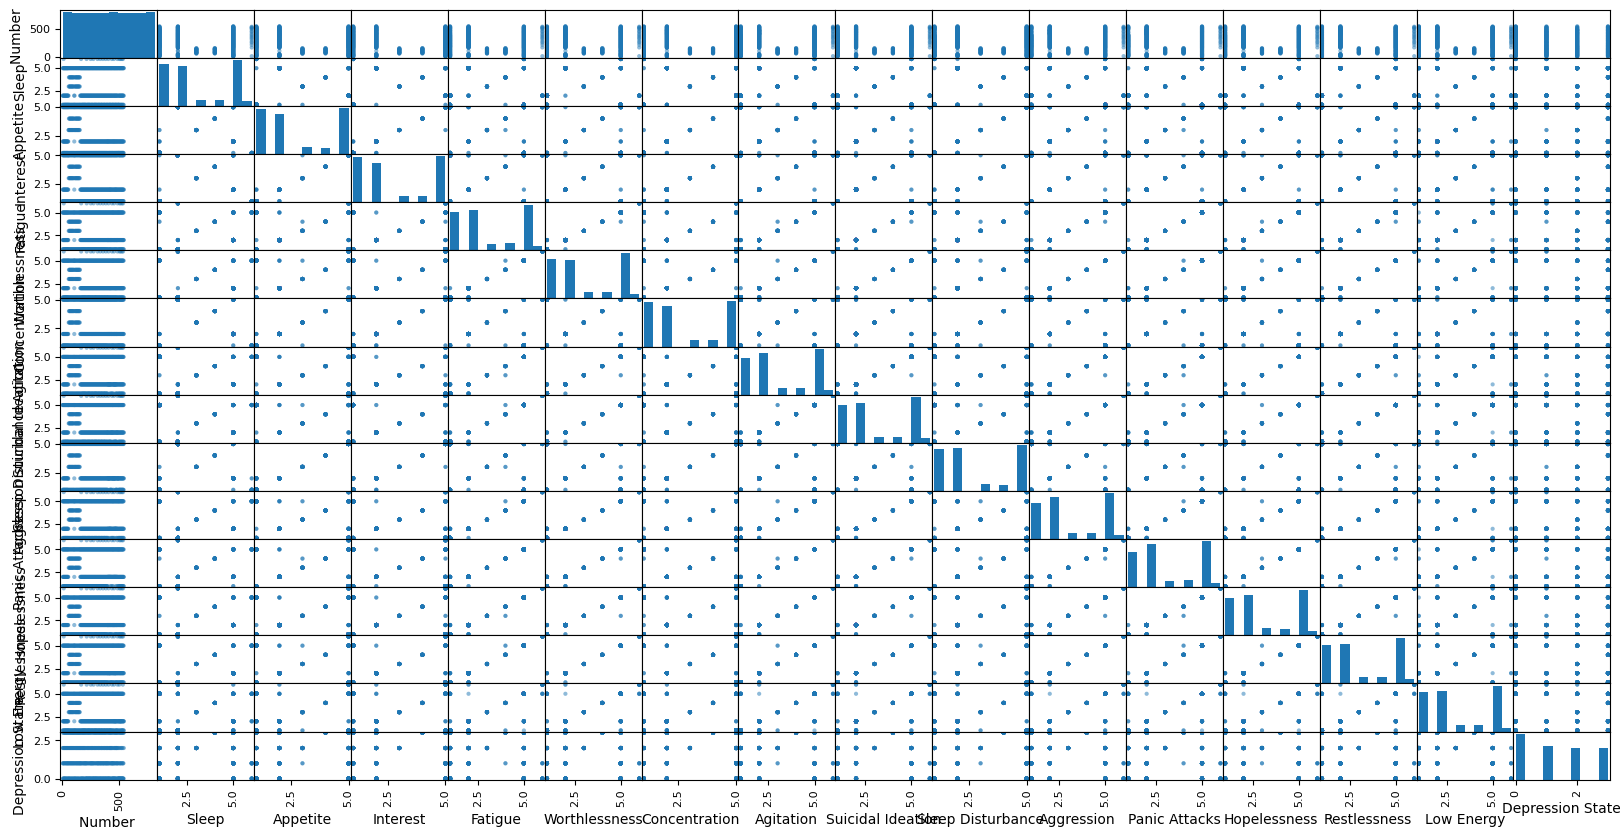

In [60]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(20,10))
plt.show()

(0.0, 3.0, 0.0, 6.0)

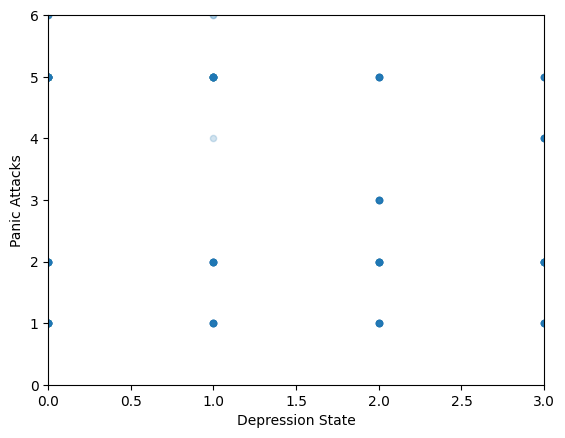

In [65]:
df.plot(kind="scatter", x="Depression State",y = "Panic Attacks",
             alpha=0.1)
plt.axis([0, 3, 0, 6])